Common to all file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('ISARCHackathonDataset_O1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Compressive strength tests                      519 non-null    object 
 1   Elastic modulus tests                           321 non-null    object 
 2   Flexural strength tests                         106 non-null    object 
 3   Splitting tensile strength tests                267 non-null    object 
 4   Effective water- to-cement ratio                522 non-null    float64
 5   Aggregate-to-cement ratio (a/c)                 485 non-null    float64
 6   RCA replacement ratio (RCA %)                   522 non-null    float64
 7   Parent concrete strength(MPa)                   56 non-null     float64
 8   Nominal maximum RCA size(mm)                    468 non-null    float64
 9   Nominal maximum NA size(mm)                

In [4]:
# making copy of dataset to do changes to dataset without affecting original ddataset
data_copy = data.copy()
# to save to new csv file
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

In [5]:
data_copy.describe()

,Effective water- to-cement ratio,Aggregate-to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of RCA (kg/m3),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Density of hardened concrete AD (qad)(kg/m3),Density of hardened concrete SSD (qSSD)(kg/m3),Compressive strength (f’c) (MPa)
count,522.000000,485.000000,522.000000,56.000000,468.000000,468.000000,373.000000,332.000000,361.000000,323.000000,96.000000,87.000000,93.000000,71.000000,522.000000
mean,0.479023,3.080082,51.812261,46.176786,21.420940,21.955128,2414.579088,2660.816265,5.222050,1.138731,35.594792,26.013793,2336.827957,2356.619718,42.765115
std,0.107977,0.889291,40.068741,17.161113,5.549481,5.333836,130.705806,97.409247,1.803867,0.690436,7.466633,4.013500,103.017477,93.760541,14.613932
min,0.190000,1.500000,0.000000,26.300000,7.000000,7.000000,2010.000000,2381.000000,1.600000,0.200000,15.100000,11.900000,1989.000000,2038.000000,12.400000
25%,0.410000,2.500000,15.250000,37.300000,19.000000,20.000000,2330.000000,2600.000000,4.000000,0.600000,30.100000,23.000000,2294.000000,2310.000000,33.125000
50%,0.470000,2.900000,50.000000,40.700000,20.000000,20.000000,2420.000000,2665.000000,5.100000,1.100000,35.800000,24.800000,2366.000000,2350.000000,41.800000
75%,0.540000,3.400000,100.000000,44.675000,25.000000,25.000000,2480.000000,2720.000000,6.100000,1.400000,40.050000,29.700000,2390.000000,2400.000000,50.450000
max,0.870000,6.950000,100.000000,100.000000,32.000000,38.000000,2880.000000,2970.000000,10.900000,3.150000,59.800000,32.000000,2550.000000,2610.000000,108.500000


In [6]:
data_copy

,Compressive strength tests,Elastic modulus tests,Flexural strength tests,Splitting tensile strength tests,Effective water- to-cement ratio,Aggregate-to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of RCA (kg/m3),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Density of hardened concrete AD (qad)(kg/m3),Density of hardened concrete SSD (qSSD)(kg/m3),Compressive strength (f’c) (MPa)
0,C1,C1,NaN,C1,0.45,2.50,100.0,NaN,20.0,20.0,2580.0,NaN,3.50,NaN,NaN,NaN,NaN,NaN,52.1
1,S1,NaN,NaN,NaN,0.47,3.80,0.0,NaN,20.0,25.0,NaN,2610.0,NaN,1.00,NaN,NaN,NaN,NaN,53.1
2,S1,NaN,NaN,NaN,0.55,4.03,0.0,NaN,NaN,NaN,2214.0,2687.0,2.70,1.20,NaN,NaN,NaN,NaN,25.0
3,S1,NaN,NaN,NaN,0.47,3.50,100.0,NaN,20.0,25.0,2273.0,NaN,3.60,NaN,NaN,NaN,NaN,NaN,41.6
4,S1,C2,NaN,NaN,0.48,2.80,100.0,NaN,19.0,25.0,2390.0,NaN,4.40,NaN,NaN,NaN,NaN,NaN,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,S1,C1,NaN,C1,0.55,2.60,0.0,NaN,20.0,32.0,NaN,2620.0,NaN,1.10,NaN,NaN,NaN,NaN,48.6
544,C1,C1,B1,NaN,0.48,4.90,64.0,36.0,25.0,20.0,2250.0,2570.0,7.00,1.20,NaN,NaN,NaN,2200.0,45.6
545,C2,NaN,NaN,NaN,0.50,2.50,50.0,NaN,25.0,32.0,2452.0,2652.0,4.10,0.80,NaN,NaN,2296.0,NaN,51.0
546,S2,C2,B1,NaN,0.44,3.83,0.0,NaN,NaN,NaN,2510.0,2670.0,2.01,0.68,NaN,NaN,NaN,NaN,52.1


Data Exploration of Target Varibale (i.e, Compressive strength (f’c) (MPa))

In [7]:
data_copy['Compressive strength (f’c) (MPa)']

0      52.1
1      53.1
2      25.0
3      41.6
4      27.2
       ... 
543    48.6
544    45.6
545    51.0
546    52.1
547    53.4
Name: Compressive strength (f’c) (MPa), Length: 548, dtype: float64

In [8]:
data_copy['Compressive strength (f’c) (MPa)'].describe()

count    522.000000
mean      42.765115
std       14.613932
min       12.400000
25%       33.125000
50%       41.800000
75%       50.450000
max      108.500000
Name: Compressive strength (f’c) (MPa), dtype: float64

In [9]:
# adding a new column as 'ID' to plot the sactter plot
data_copy.insert(0, 'ID', range(len(data_copy)))

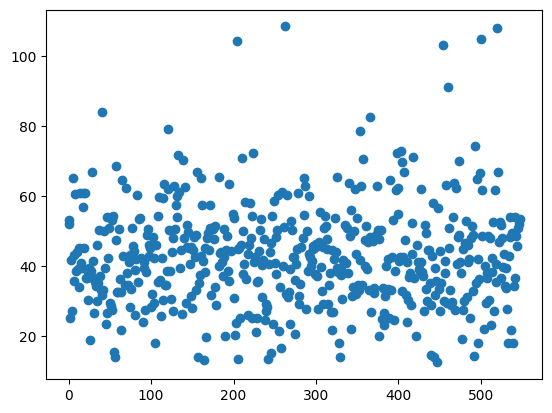

In [10]:
plt.scatter(x = data_copy['ID'], y = data_copy['Compressive strength (f’c) (MPa)'])

resolving outliers

<Axes: xlabel='Compressive strength (f’c) (MPa)'>

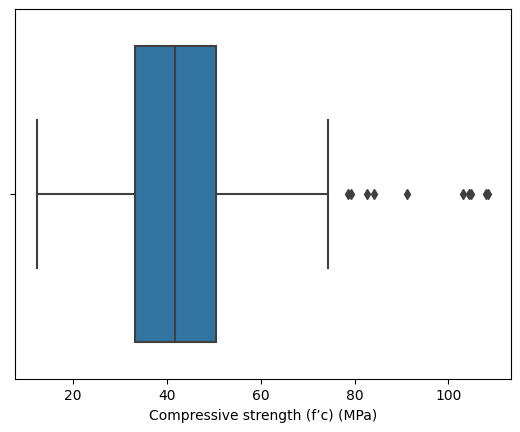

In [11]:
sns.boxplot(x=data_copy['Compressive strength (f’c) (MPa)'])

Removing Outliers in the target variable by imputing with :
    1. lower_limit
    2. upper_limit

In [12]:
q1 = data_copy['Compressive strength (f’c) (MPa)'].quantile(.25)
q3 = data_copy['Compressive strength (f’c) (MPa)'].quantile(.75)
iqr = q3-q1

In [13]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit=min(data['Compressive strength (f’c) (MPa)'])
upper_limit, lower_limit

(76.4375, 12.4)

In [14]:
#  limit_imputer will replace the outliers greater then upper_limit with upper_limit
#  and  will replace the outliers lesser then lower_limit with lower_limit
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [15]:
data_copy['Compressive strength (f’c) (MPa)'] = data_copy['Compressive strength (f’c) (MPa)'].apply(limit_imputer)

In [16]:
# target variable after removing outliers
data_copy['Compressive strength (f’c) (MPa)'].describe()

count    522.000000
mean      42.419856
std       13.462481
min       12.400000
25%       33.125000
50%       41.800000
75%       50.450000
max       76.437500
Name: Compressive strength (f’c) (MPa), dtype: float64

Deleting the rows for missing values in target variables 
(As imputaition will affect the result so we are avoiding imputaion) 

In [17]:
data_copy.dropna(inplace=True, axis = 0, subset=['Compressive strength (f’c) (MPa)'])
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

In [18]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              522 non-null    int64  
 1   Compressive strength tests                      519 non-null    object 
 2   Elastic modulus tests                           321 non-null    object 
 3   Flexural strength tests                         106 non-null    object 
 4   Splitting tensile strength tests                267 non-null    object 
 5   Effective water- to-cement ratio                522 non-null    float64
 6   Aggregate-to-cement ratio (a/c)                 485 non-null    float64
 7   RCA replacement ratio (RCA %)                   522 non-null    float64
 8   Parent concrete strength(MPa)                   56 non-null     float64
 9   Nominal maximum RCA size(mm)               

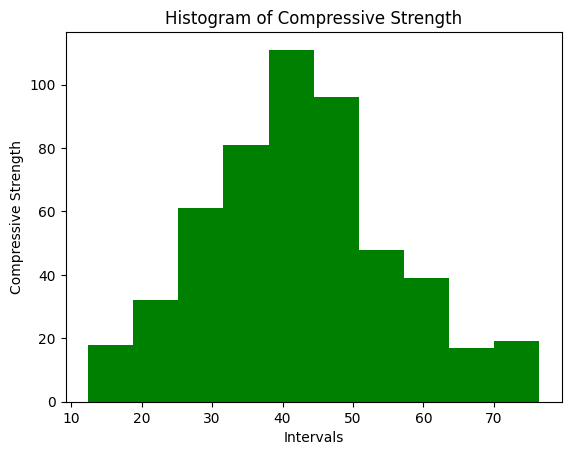

In [19]:
plt.hist(data_copy['Compressive strength (f’c) (MPa)'], bins=10,color='green')
plt.xlabel("Intervals")
plt.ylabel("Compressive Strength")
plt.title("Histogram of Compressive Strength")
plt.show()

# treating independent variables using imputation by mean strategy 
'Effective water- to-cement ratio',
'Aggregate-to-cement ratio (a/c)',
'RCA replacement ratio (RCA %)',
'Aggregate-to-cement ratio (a/c)',
'Parent concrete strength(MPa)',
'Nominal maximum RCA size(mm)',
'Nominal maximum NA size(mm)',
'Water absorption of RCA(WARCA) (%)',
'Water absorption of NA',
'Los Angeles abrasion of RCA',
'Los Angeles abrasion of NA'

Select the imputaion method based on requirements

In [20]:
numerical_column = ['Effective water- to-cement ratio',
                    'Aggregate-to-cement ratio (a/c)',
                    'RCA replacement ratio (RCA %)',
                    'Aggregate-to-cement ratio (a/c)',
                    'Parent concrete strength(MPa)',
                    'Nominal maximum RCA size(mm)',
                    'Nominal maximum NA size(mm)',
                    'Water absorption of RCA(WARCA) (%)',
                    'Water absorption of NA',
                    'Los Angeles abrasion of RCA',
                    'Los Angeles abrasion of NA'
                   ]

In [21]:
data_copy.isnull().sum()

ID                                                  0
Compressive strength tests                          3
Elastic modulus tests                             201
Flexural strength tests                           416
Splitting tensile strength tests                  255
Effective water- to-cement ratio                    0
Aggregate-to-cement ratio (a/c)                    37
RCA replacement ratio (RCA %)                       0
Parent concrete strength(MPa)                     466
Nominal maximum RCA size(mm)                       54
Nominal maximum NA size(mm)                        54
Bulk density of RCA (kg/m3)                       149
Bulk density of NA (kg/m3)                        190
Water absorption of RCA(WARCA) (%)                161
Water absorption of NA                            199
Los Angeles abrasion of RCA                       426
Los Angeles abrasion of NA                        435
Density of hardened concrete AD (qad)(kg/m3)      429
Density of hardened concrete

Specify your strategy :
    1. Mean-(mean)
    2. Median-(median)
    3. Mode-(most-frequent)
    4. Regression Imputation-()
    5. Multiple Imputation-()

In [22]:
# 1. Mean-(mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data_copy[numerical_column] = imputer.fit_transform(data_copy[numerical_column])
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

#  2. Median-(median)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data_copy[numerical_column] = imputer.fit_transform(data_copy[numerical_column])
data_copy.to_csv('MedianImputedData.csv', index=False)
data_copy=pd.read_csv('MedianImputedData.csv')

# 3. Mode-(most-frequent)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_copy[numerical_column] = imputer.fit_transform(data_copy[numerical_column])
data_copy.to_csv('ModeImputedData.csv', index=False)
data_copy=pd.read_csv('ModeImputedData.csv')

# 4. Regression Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numerical_columns = data_copy.select_dtypes(include=[np.number]).columns.tolist()

#Create a regression imputation model
imp_model = IterativeImputer(estimator=None, max_iter=10, random_state=123)

#Impute missing values using regression imputation
data_copy = data_copy.copy()
for column in numerical_columns:
    column_data = data_copy[column].values.reshape(-1, 1)
    if data_copy[column].isna().sum() > 0:
        imputed_data = imp_model.fit_transform(column_data)
        data_copy[column] = imputed_data


data_copy.to_csv('RegressionImputedData.csv', index=False)
data_copy=pd.read_csv('RegressionImputedData.csv')


# 5. Multiple Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
numerical_columns = data_copy.select_dtypes(include=[np.number]).columns.tolist()

#Create a multiple imputation model using regression
imp_model = IterativeImputer(estimator=None, max_iter=10, random_state=123)

#Impute missing values using multiple imputation
data_copy = data_copy.copy()
imputed_data = imp_model.fit_transform(data_copy[numerical_columns])
data_copy[numerical_columns] = imputed_data

data_copy.to_csv('MultipleImputedData.csv', index=False)
data_copy = pd.read_csv('MultipleImputedData.csv')


In [23]:
data_copy.isnull().sum()

ID                                                  0
Compressive strength tests                          3
Elastic modulus tests                             201
Flexural strength tests                           416
Splitting tensile strength tests                  255
Effective water- to-cement ratio                    0
Aggregate-to-cement ratio (a/c)                     0
RCA replacement ratio (RCA %)                       0
Parent concrete strength(MPa)                       0
Nominal maximum RCA size(mm)                        0
Nominal maximum NA size(mm)                         0
Bulk density of RCA (kg/m3)                       149
Bulk density of NA (kg/m3)                        190
Water absorption of RCA(WARCA) (%)                  0
Water absorption of NA                              0
Los Angeles abrasion of RCA                         0
Los Angeles abrasion of NA                          0
Density of hardened concrete AD (qad)(kg/m3)      429
Density of hardened concrete

In [24]:
data_copy.drop(columns = ['ID','Compressive strength tests',
                     'Elastic modulus tests',
                     'Flexural strength tests',
                     'Splitting tensile strength tests',
                     'Bulk density of RCA (kg/m3)',
                     'Density of hardened concrete AD (qad)(kg/m3)',
                     'Density of hardened concrete SSD (qSSD)(kg/m3)'
                    ]).corr()

,Effective water- to-cement ratio,Aggregate-to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Compressive strength (f’c) (MPa)
Effective water- to-cement ratio,1.000000,0.391748,-0.080553,-0.162549,0.034354,0.066167,-0.115468,0.070204,0.062217,0.092619,-0.057253,-0.310347
Aggregate-to-cement ratio (a/c),0.391748,1.000000,-0.100066,-0.108561,0.162394,0.002241,0.080571,0.074609,-0.007081,0.067907,-0.037274,-0.307501
RCA replacement ratio (RCA %),-0.080553,-0.100066,1.000000,0.057848,0.162843,0.124853,0.107624,0.044829,0.021053,-0.059167,0.031725,-0.157332
Parent concrete strength(MPa),-0.162549,-0.108561,0.057848,1.000000,-0.121232,-0.170077,0.036864,-0.187587,0.027944,-0.212406,0.032536,0.147736
Nominal maximum RCA size(mm),0.034354,0.162394,0.162843,-0.121232,1.000000,0.405828,0.113055,-0.160757,-0.224053,0.151957,0.075303,-0.367337
Nominal maximum NA size(mm),0.066167,0.002241,0.124853,-0.170077,0.405828,1.000000,-0.104351,0.007470,0.018691,0.093724,-0.061910,-0.232157
Bulk density of NA (kg/m3),-0.115468,0.080571,0.107624,0.036864,0.113055,-0.104351,1.000000,0.103694,-0.330473,-0.054936,-0.234588,-0.065800
Water absorption of RCA(WARCA) (%),0.070204,0.074609,0.044829,-0.187587,-0.160757,0.007470,0.103694,1.000000,0.125633,0.045156,-0.028675,0.002191
Water absorption of NA,0.062217,-0.007081,0.021053,0.027944,-0.224053,0.018691,-0.330473,0.125633,1.000000,-0.064175,0.027634,0.020948
Los Angeles abrasion of RCA,0.092619,0.067907,-0.059167,-0.212406,0.151957,0.093724,-0.054936,0.045156,-0.064175,1.000000,0.120795,-0.043150


# Model Training and Evaluation

Common to all

In [25]:
# from sklearn.datasets import make_classification
# from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
X=data_copy.iloc[:,:-1].values
y=data_copy.iloc[:,-1].values

In [27]:
# Split 80% of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the remaining 20% of the dataset into validation set and testing set
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


data_copy = data_copy.drop(['Compressive strength tests',
                     'Elastic modulus tests',
                     'Flexural strength tests',
                     'Splitting tensile strength tests',
                     'Bulk density of RCA (kg/m3)',
                     'Bulk density of NA (kg/m3)',
                     'Density of hardened concrete AD (qad)(kg/m3)',
                     'Density of hardened concrete SSD (qSSD)(kg/m3)',],axis=1)
data_copy.to_csv('MeanImputedData.csv', index=False)
data_copy=pd.read_csv('MeanImputedData.csv')

In [28]:
try:
    # Load dataset
    data_copy = pd.read_csv('MeanImputedData.csv')
    # Drop columns
    data_copy = data_copy.drop(['ID','Compressive strength tests',
                         'Elastic modulus tests',
                         'Flexural strength tests',
                         'Splitting tensile strength tests',
                         'Bulk density of RCA (kg/m3)',
                         'Bulk density of NA (kg/m3)',
                         'Density of hardened concrete AD (qad)(kg/m3)',
                         'Density of hardened concrete SSD (qSSD)(kg/m3)'], axis=1)

    # Save to file
    data_copy.to_csv('MeanImputedData.csv', index=False)
except Exception as e:
    print('Error:', e)
data_copy = pd.read_csv('MeanImputedData.csv')

data["Compressive strength (f’c) (MPa)"] = np.round(["Compressive strength (f’c) (MPa)"])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_copy.drop(columns=["Compressive strength (f’c) (MPa)"]), data_copy["Compressive strength (f’c) (MPa)"], test_size=0.2, random_state=42)

normalization of target variable

In [30]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [31]:
# y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_test = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [32]:
# Multiple Linear Regression:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
y_pred = mlr.predict(X_test)
mlr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % mlr_mse)
print("Score : ",mlr_score)

Mean Squared Error: 152.94
Score :  0.0098263420334469


In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
decision_score = tr_regressor.score(X_test,y_test)
y_pred = tr_regressor.predict(X_test)
tr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % tr_mse)
print("Score : ",decision_score)

Mean Squared Error: 95.28
Score :  0.3831192760981138


In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=28,random_state=0)
RFModel.fit(X_train,y_train)
RF_score = RFModel.score(X_test,y_test)
RF_pred =RFModel.predict(X_test)
RF_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % RF_mse)
print("Score : ",RF_score)


Mean Squared Error: 95.28
Score :  0.6749518944999999


In [35]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

GBBoosting = GradientBoostingRegressor()
GBBoosting.fit(X_train, y_train)
GB_pred = GBBoosting.predict(X_test)
GB_score = GBBoosting.score(X_test,y_test)
GB_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % GB_mse)
print("Score : ",GB_score)


Mean Squared Error: 95.28
Score :  0.6733327863762999


In [36]:
# Support Vector Regression (SVR) 
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma='auto')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_score = svr.score(X_test,y_test)
svr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % svr_mse)
print("Score : ",svr_score)

Mean Squared Error: 197.06
Score :  -0.27584912305598164


In [37]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gbmModel = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gbmModel.fit(X_train, y_train)
y_pred = gbmModel.predict(X_test)
gbm_score = gbmModel.score(X_test, y_test)
GBMmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % GBMmse)
print("Score : ",gbm_score)

Mean Squared Error: 36.91
Score :  0.761026853535886


In [38]:
# Neural Networks
from keras.layers import Dense
from keras.models import Sequential

NNModel = Sequential()
NNModel.add(Dense(32, input_dim=10, activation='relu'))
NNModel.add(Dense(16, activation='relu'))
NNModel.add(Dense(1, activation='linear'))

NNModel.compile(loss='mean_squared_error', optimizer='adam')
NNModel.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred = NNModel.predict(X_test)
NNmse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % NNmse)

4/4 [==============================] - 0s 3ms/step
Mean Squared Error: 157.52


In [39]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

base_model = DecisionTreeRegressor(max_depth=3)
Ada_model = AdaBoostRegressor(estimator=base_model, n_estimators=100, learning_rate=0.1, random_state=42)
Ada_model.fit(X_train, y_train)
y_pred = Ada_model.predict(X_test)
Ada_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", Ada_mse)
Ada_score = Ada_model.score(X_test, y_test)
print("Score : ",Ada_score)

Mean Squared Error: 75.39970602417125
Score :  0.5118299484824019


In [40]:
# XGBoost Regressor
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", xgb_mse)
xgb_score = xgb_model.score(X_test, y_test)
print("Score : ",xgb_score)

Mean Squared Error: 40.69946169358122
Score :  0.7364942204771356


In [41]:
import pickle

In [42]:
pickle.dump(gbmModel, open('GBM_Model.pkl','wb'))